INSTITUTO TECNOLOGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY

 CAMPUS PUEBLA

ANALITICA DE DATOS Y HERRAMIENTAS DE INTELIGENCIA ARTIFICIAL II

REGRESIÓN LINEAL SIMPLE (Shared Room)

ALUMNO:

Ángel Roberto González Angulo | A01735880

PROFESORES:

Alfredo García Suárez

GRUPO:
501


FECHA DE ENTREGA:
07/10/2024

# Librería y carga de Archivo

In [62]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_excel("OttawaSturges.xlsx")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head(6)

,last_scraped,source,host_name,host_response_time,host_verifications,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,...,hostResponseCat,hostAcceptanceCat,hostVerifCat,bedsCategory,reviewsMonthCat,reviewScoresCat,reviewLocationCat,reviewRatingCat,reviewCleanCat,reviewCommunicationCat
0,2024-06-21,city scrape,Glenn,within an hour,"['email', 'phone']",Kitchissippi,Entire rental unit,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Coffee maker"", ""Smoke ...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
1,2024-06-21,city scrape,Daniel,within a day,"['email', 'phone']",Rideau-Goulbourn,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Kitchen"", ""Sha...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
2,2024-06-21,city scrape,Ela,within an hour,"['email', 'phone']",Capital,Private room in home,Private room,1 private bath,"[""Free washer \u2013 In building"", ""Extra pill...",...,(91 - 100%) Tasa de respuesta perfecta,(92 - 100%) Excelente,(2) Verificación moderada,(0 - 1) Una cama,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
3,2024-06-21,city scrape,William,within an hour,['phone'],Gloucester-South Nepean,Entire home,Entire home/apt,1 bath,"[""Kitchen"", ""Shampoo"", ""Host greets you"", ""Smo...",...,(91 - 100%) Tasa de respuesta perfecta,(74 - 82%) Muy bueno,(0 - 1) Verificación básica,(3 - 5) Camas múltiples,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
4,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire home,Entire home/apt,1 bath,"[""Extra pillows and blankets"", ""Self check-in""...",...,(91 - 100%) Tasa de respuesta perfecta,(83 - 91%) Alto,(3) Verificación completa,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho
5,2024-06-21,city scrape,Greg And Valerie,within an hour,"['email', 'phone', 'work_email']",Kitchissippi,Entire townhouse,Entire home/apt,1 bath,"[""Self check-in"", ""Free driveway parking on pr...",...,(91 - 100%) Tasa de respuesta perfecta,(83 - 91%) Alto,(3) Verificación completa,(2) Pocas camas,(0) Sin reseñas,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho,(5) Muy satisfecho


In [64]:
# Antes de dividir el dataframe, observamos los valores numéricos de la columna catégorica "room_type"
df[["room_type","room_type_num"]].value_counts()

room_type        room_type_num
Entire home/apt  0                1759
Private room     1                1096
Shared room      2                   7
Name: count, dtype: int64

In [65]:
# Fragmentamos el dataframe solo con las variables a analizar

df1 = df[["room_type_num","host_acceptance_rate","host_response_rate","review_scores_location","review_scores_cleanliness",
          "price","availability_365", "number_of_reviews", "reviews_per_month","review_scores_communication","review_scores_value"]]

In [66]:
df1["review_scores_location"]

0       5
1       5
2       5
3       5
4       5
       ..
2857    5
2858    5
2859    5
2860    5
2861    5
Name: review_scores_location, Length: 2862, dtype: int64

In [67]:
# Corroboramos
df1["room_type_num"].value_counts()

room_type_num
0    1759
1    1096
2       7
Name: count, dtype: int64

# Dividir el dataframe según el tipo de habitación

## Shared Room | 2

In [68]:
dfHome = df1[df1["room_type_num"] == 2]
dfHome

,room_type_num,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,review_scores_value
2036,2,0.0,0.0,5,5,60,269,0,1.16,5,5
2811,2,89.0,86.0,5,5,45,267,1,1.00,5,5
2824,2,89.0,86.0,5,5,45,268,1,1.00,5,4
2825,2,89.0,86.0,5,5,45,268,0,1.16,5,5
2826,2,89.0,86.0,5,5,45,267,0,1.16,5,5
2827,2,89.0,86.0,5,5,45,268,0,1.16,5,5
2828,2,89.0,86.0,5,5,45,267,0,1.16,5,5


### Filtro: “host_acceptance_rate vs host_response_rate”

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

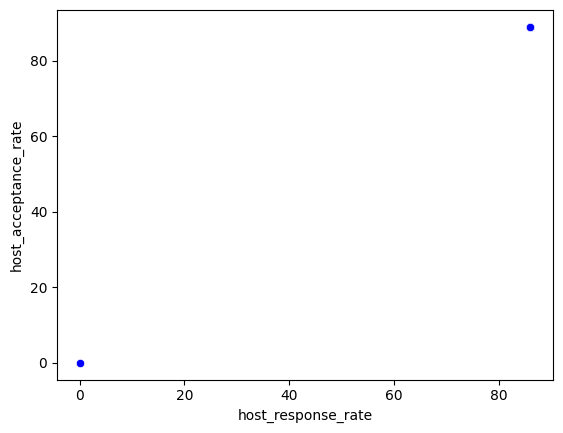

In [69]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [70]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["host_response_rate"]] # Independiente = x
Var_Dep = dfHome[["host_acceptance_rate"]] # Dependiente = y

In [71]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [72]:
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)

LinearRegression()

In [73]:
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.03488372]]),
 'rank_': 1,
 'singular_': array([79.62052858]),
 'intercept_': array([1.42108547e-14])}

**Modelo Matemático: y = 1.03488372x + 1.42108547e-14**

In [74]:
# Predecimos los valores de "host_response_rate" a partir de la variable "host_acceptance_rate"
y_pred = model.predict(X = dfHome[['host_response_rate']])
y_pred

array([[1.42108547e-14],
       [8.90000000e+01],
       [8.90000000e+01],
       [8.90000000e+01],
       [8.90000000e+01],
       [8.90000000e+01],
       [8.90000000e+01]])

In [75]:
# Insertamos la columna de preddiciones en el df
dfHome.insert(2, 'Predict1', y_pred)
dfHome

,room_type_num,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,review_scores_value
2036,2,0.0,1.421085e-14,0.0,5,5,60,269,0,1.16,5,5
2811,2,89.0,8.900000e+01,86.0,5,5,45,267,1,1.00,5,5
2824,2,89.0,8.900000e+01,86.0,5,5,45,268,1,1.00,5,4
2825,2,89.0,8.900000e+01,86.0,5,5,45,268,0,1.16,5,5
2826,2,89.0,8.900000e+01,86.0,5,5,45,267,0,1.16,5,5
2827,2,89.0,8.900000e+01,86.0,5,5,45,268,0,1.16,5,5
2828,2,89.0,8.900000e+01,86.0,5,5,45,267,0,1.16,5,5


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

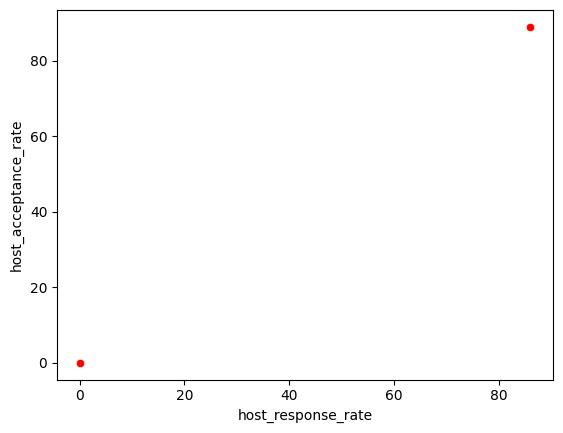

In [76]:
# Gráfica de comparación
sns.scatterplot(x = 'host_response_rate', y = 'host_acceptance_rate', color = 'blue', data = dfHome)
sns.scatterplot(x = 'host_response_rate', y = 'Predict1', color = "red", data = dfHome)

In [77]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_1 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_1 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

1.0

In [78]:
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_1 = np.sqrt(coef_Deter_1)
coef_Correl_1 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

1.0

### Filtro: “host_acceptance_rate vs price”

<Axes: xlabel='price', ylabel='host_acceptance_rate'>

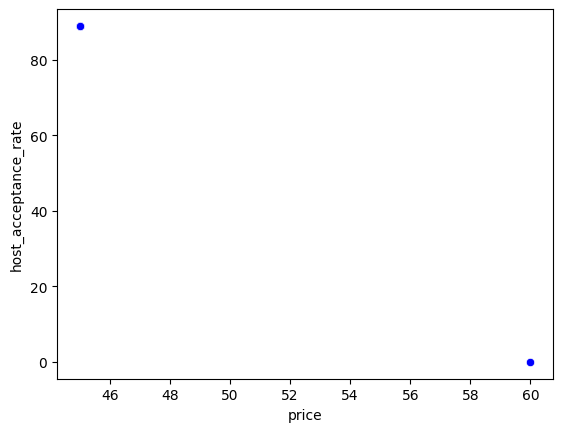

In [79]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'price', y = 'host_acceptance_rate', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [80]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["price"]]
Var_Dep = dfHome[["host_acceptance_rate"]]

In [81]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-5.93333333]]),
 'rank_': 1,
 'singular_': array([13.8873015]),
 'intercept_': array([356.])}

**Modelo Matemático: y = -5.93333333x + 356**

In [82]:
# Predecimos los valores de "host_acceptance_rate" a partir de la variable "price"
y_pred = model.predict(X = dfHome[['price']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(8, 'Predict2', y_pred)
dfHome

,room_type_num,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,review_scores_value
2036,2,0.0,1.421085e-14,0.0,5,5,60,269,5.684342e-14,0,1.16,5,5
2811,2,89.0,8.900000e+01,86.0,5,5,45,267,8.900000e+01,1,1.00,5,5
2824,2,89.0,8.900000e+01,86.0,5,5,45,268,8.900000e+01,1,1.00,5,4
2825,2,89.0,8.900000e+01,86.0,5,5,45,268,8.900000e+01,0,1.16,5,5
2826,2,89.0,8.900000e+01,86.0,5,5,45,267,8.900000e+01,0,1.16,5,5
2827,2,89.0,8.900000e+01,86.0,5,5,45,268,8.900000e+01,0,1.16,5,5
2828,2,89.0,8.900000e+01,86.0,5,5,45,267,8.900000e+01,0,1.16,5,5


<Axes: xlabel='price', ylabel='host_acceptance_rate'>

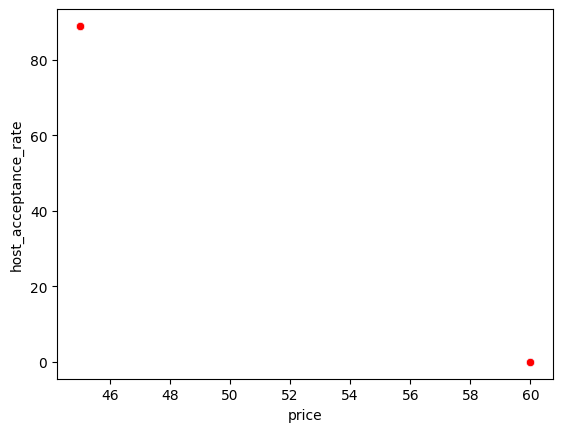

In [83]:
# Gráfica de comparación
sns.scatterplot(x = 'price', y = 'host_acceptance_rate', color = 'blue', data = dfHome)
sns.scatterplot(x = 'price', y = 'Predict2', color = "red", data = dfHome)

In [84]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_2 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_2 # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_2 = np.sqrt(coef_Deter_2)
coef_Correl_2 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

1.0

### Filtro: “host_acceptance_rate vs number_of_reviews”

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

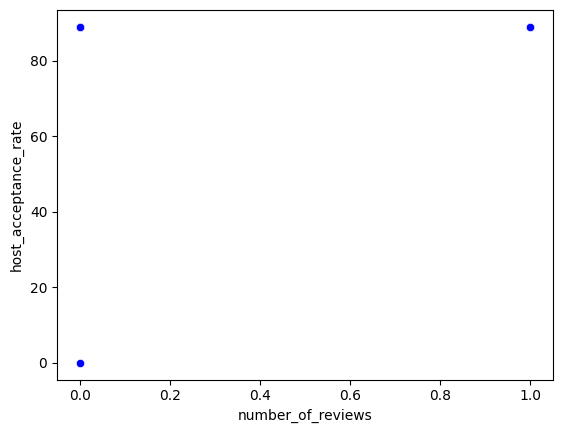

In [85]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'number_of_reviews', y = 'host_acceptance_rate', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [86]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["number_of_reviews"]]
Var_Dep = dfHome[["host_acceptance_rate"]]

In [87]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[17.8]]),
 'rank_': 1,
 'singular_': array([1.19522861]),
 'intercept_': array([71.2])}

**Modelo Matemático y = 17.8x + 71.2**

In [88]:
# Predecimos los valores de "host_acceptance_rate" a partir de la variable "number_of_reviews"
y_pred = model.predict(X = dfHome[['number_of_reviews']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(1, 'Predict3', y_pred)
dfHome

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,review_scores_value
2036,2,71.2,0.0,1.421085e-14,0.0,5,5,60,269,5.684342e-14,0,1.16,5,5
2811,2,89.0,89.0,8.900000e+01,86.0,5,5,45,267,8.900000e+01,1,1.00,5,5
2824,2,89.0,89.0,8.900000e+01,86.0,5,5,45,268,8.900000e+01,1,1.00,5,4
2825,2,71.2,89.0,8.900000e+01,86.0,5,5,45,268,8.900000e+01,0,1.16,5,5
2826,2,71.2,89.0,8.900000e+01,86.0,5,5,45,267,8.900000e+01,0,1.16,5,5
2827,2,71.2,89.0,8.900000e+01,86.0,5,5,45,268,8.900000e+01,0,1.16,5,5
2828,2,71.2,89.0,8.900000e+01,86.0,5,5,45,267,8.900000e+01,0,1.16,5,5


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

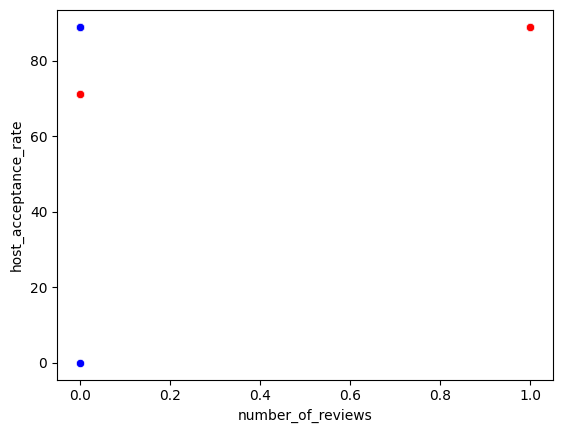

In [89]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews', y = 'host_acceptance_rate', color = 'blue', data = dfHome)
sns.scatterplot(x = 'number_of_reviews', y = 'Predict3', color = "red", data = dfHome)

In [90]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_3 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_3
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_3 = np.sqrt(coef_Deter_3)
coef_Correl_3 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.2581988897471609

### Filtro: “review_scores_location vs review_scores_cleanliness”

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

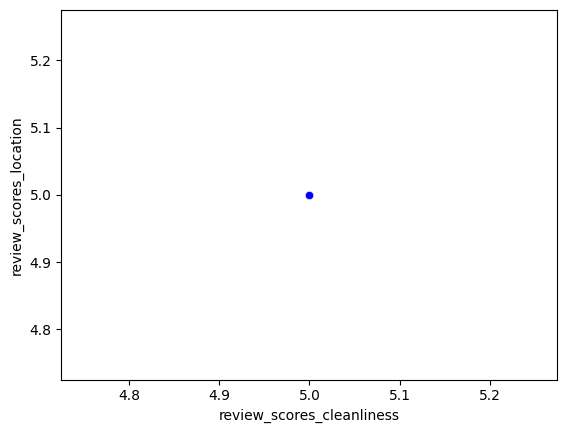

In [91]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'review_scores_cleanliness', y = 'review_scores_location', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [92]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["review_scores_cleanliness"]]
Var_Dep = dfHome[["review_scores_location"]]

In [93]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.]]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': array([5.])}

**Modelo Matemático: y = 0x + 5**

In [94]:
# Predecimos los valores de "review_scores_location" a partir de la variable "review_scores_cleanliness"
y_pred = model.predict(X = dfHome[['review_scores_cleanliness']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(6, 'Predict4', y_pred)
dfHome

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,review_scores_value
2036,2,71.2,0.0,1.421085e-14,0.0,5,5.0,5,60,269,5.684342e-14,0,1.16,5,5
2811,2,89.0,89.0,8.900000e+01,86.0,5,5.0,5,45,267,8.900000e+01,1,1.00,5,5
2824,2,89.0,89.0,8.900000e+01,86.0,5,5.0,5,45,268,8.900000e+01,1,1.00,5,4
2825,2,71.2,89.0,8.900000e+01,86.0,5,5.0,5,45,268,8.900000e+01,0,1.16,5,5
2826,2,71.2,89.0,8.900000e+01,86.0,5,5.0,5,45,267,8.900000e+01,0,1.16,5,5
2827,2,71.2,89.0,8.900000e+01,86.0,5,5.0,5,45,268,8.900000e+01,0,1.16,5,5
2828,2,71.2,89.0,8.900000e+01,86.0,5,5.0,5,45,267,8.900000e+01,0,1.16,5,5


<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_location'>

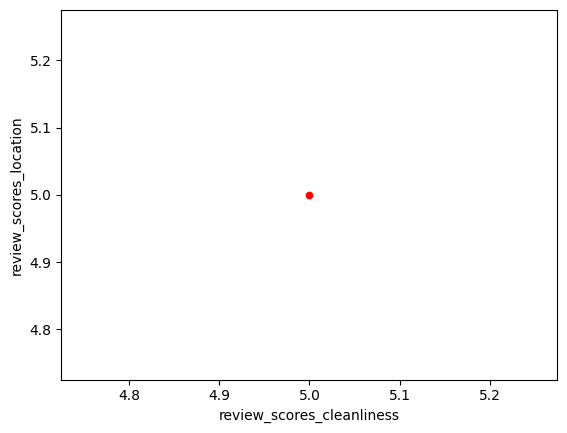

In [95]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_cleanliness', y = 'review_scores_location', color = 'blue', data = dfHome)
sns.scatterplot(x = 'review_scores_cleanliness', y = 'Predict4', color = "red", data = dfHome)

In [96]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_4 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_4
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_4 = np.sqrt(coef_Deter_4)
coef_Correl_4 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

1.0

### Filtro: availability_365 vs number_of_reviews

<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

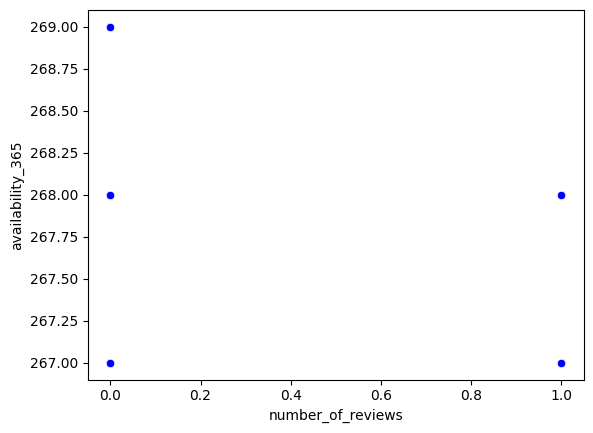

In [97]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'number_of_reviews', y = 'availability_365', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [98]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["number_of_reviews"]]
Var_Dep = dfHome[["availability_365"]]

In [99]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-0.3]]),
 'rank_': 1,
 'singular_': array([1.19522861]),
 'intercept_': array([267.8])}

**Modelo Matemático: y = -0.3x + 267.8**

In [100]:
# Predecimos los valores de "availability_365" a partir de la variable "number_of_reviews"
y_pred = model.predict(X = dfHome[['number_of_reviews']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(7, 'Predict5', y_pred)
dfHome

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,reviews_per_month,review_scores_communication,review_scores_value
2036,2,71.2,0.0,1.421085e-14,0.0,5,5.0,267.8,5,60,269,5.684342e-14,0,1.16,5,5
2811,2,89.0,89.0,8.900000e+01,86.0,5,5.0,267.5,5,45,267,8.900000e+01,1,1.00,5,5
2824,2,89.0,89.0,8.900000e+01,86.0,5,5.0,267.5,5,45,268,8.900000e+01,1,1.00,5,4
2825,2,71.2,89.0,8.900000e+01,86.0,5,5.0,267.8,5,45,268,8.900000e+01,0,1.16,5,5
2826,2,71.2,89.0,8.900000e+01,86.0,5,5.0,267.8,5,45,267,8.900000e+01,0,1.16,5,5
2827,2,71.2,89.0,8.900000e+01,86.0,5,5.0,267.8,5,45,268,8.900000e+01,0,1.16,5,5
2828,2,71.2,89.0,8.900000e+01,86.0,5,5.0,267.8,5,45,267,8.900000e+01,0,1.16,5,5


<Axes: xlabel='number_of_reviews', ylabel='availability_365'>

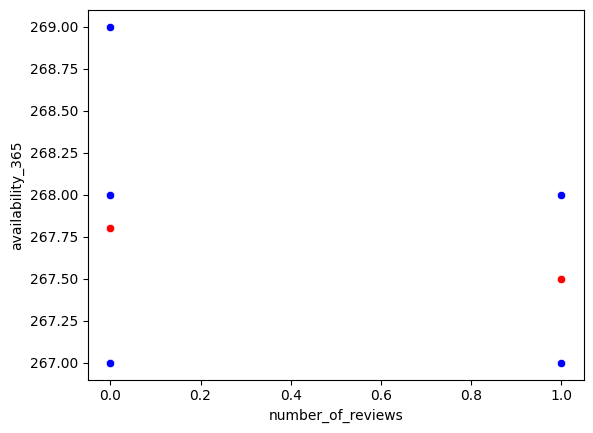

In [101]:
# Gráfica de comparación
sns.scatterplot(x = 'number_of_reviews', y = 'availability_365', color = 'blue', data = dfHome)
sns.scatterplot(x = 'number_of_reviews', y = 'Predict5', color = "red", data = dfHome)

In [102]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_5 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_5 # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_5 = np.sqrt(coef_Deter_5)
coef_Correl_5 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.1936491673103702

### Filtro: reviews_per_month vs review_scores_communication

<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

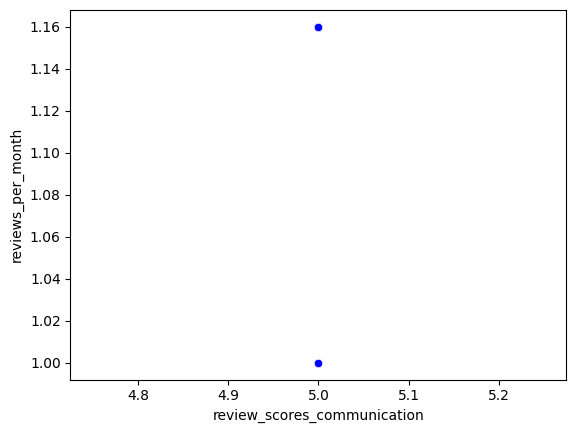

In [103]:
# Imprimimos el scatterplot entre la variable dependiente e independiente
from turtle import color

sns.scatterplot(x = 'review_scores_communication', y = 'reviews_per_month', color = 'blue', data = dfHome) # Independiente, Dependiente, color, df

In [104]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["review_scores_communication"]]
Var_Dep = dfHome[["reviews_per_month"]]

In [105]:
# Se define model con la función de regresión Lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.]]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': array([1.11428571])}

**Modelo Matemático: y = 0x + 1.11428571**

In [106]:
# Predecimos los valores de "reviews_per_month" a partir de la variable "review_scores_communication"
y_pred = model.predict(X = dfHome[['review_scores_communication']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(13, 'Predict6', y_pred)
dfHome

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,Predict6,reviews_per_month,review_scores_communication,review_scores_value
2036,2,71.2,0.0,1.421085e-14,0.0,5,5.0,267.8,5,60,269,5.684342e-14,0,1.114286,1.16,5,5
2811,2,89.0,89.0,8.900000e+01,86.0,5,5.0,267.5,5,45,267,8.900000e+01,1,1.114286,1.00,5,5
2824,2,89.0,89.0,8.900000e+01,86.0,5,5.0,267.5,5,45,268,8.900000e+01,1,1.114286,1.00,5,4
2825,2,71.2,89.0,8.900000e+01,86.0,5,5.0,267.8,5,45,268,8.900000e+01,0,1.114286,1.16,5,5
2826,2,71.2,89.0,8.900000e+01,86.0,5,5.0,267.8,5,45,267,8.900000e+01,0,1.114286,1.16,5,5
2827,2,71.2,89.0,8.900000e+01,86.0,5,5.0,267.8,5,45,268,8.900000e+01,0,1.114286,1.16,5,5
2828,2,71.2,89.0,8.900000e+01,86.0,5,5.0,267.8,5,45,267,8.900000e+01,0,1.114286,1.16,5,5


<Axes: xlabel='review_scores_communication', ylabel='reviews_per_month'>

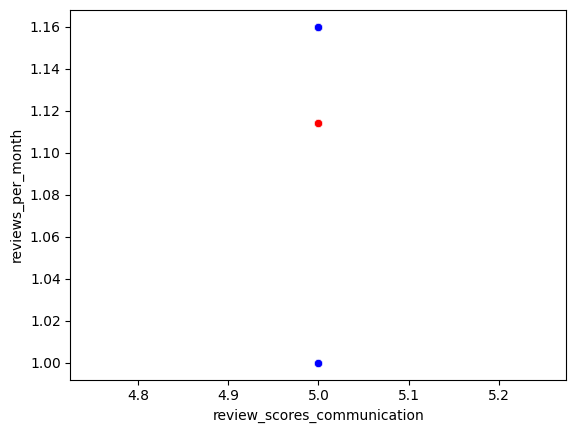

In [107]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_communication', y = 'reviews_per_month', color = 'blue', data = dfHome)
sns.scatterplot(x = 'review_scores_communication', y = 'Predict6', color = "red", data = dfHome)

In [108]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coef_Deter_6 = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter_6 # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coef_Correl_6 = np.sqrt(coef_Deter_6)
coef_Correl_6 # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.0

## Resumen

In [109]:
# Para el tipo de casa "Private room", este fue el resumen de correlaciones:
print(f"Filtro 1: 'host_acceptance_rate vs host_response_rate': {coef_Correl_1}")
print(f"Filtro 2: 'host_acceptance_rate vs price': {coef_Correl_2}")
print(f"Filtro 3: 'host_acceptance_rate vs number_of_reviews': {coef_Correl_3}")
print(f"Filtro 4: 'review_scores_location vs review_scores_cleanliness': {coef_Correl_4}")
print(f"Filtro 5: 'availability_365 vs number_of_reviews': {coef_Correl_5}")
print(f"Filtro 6: 'reviews_per_month vs review_scores_communication': {coef_Correl_6}")

Filtro 1: 'host_acceptance_rate vs host_response_rate': 1.0
Filtro 2: 'host_acceptance_rate vs price': 1.0
Filtro 3: 'host_acceptance_rate vs number_of_reviews': 0.2581988897471609
Filtro 4: 'review_scores_location vs review_scores_cleanliness': 1.0
Filtro 5: 'availability_365 vs number_of_reviews': 0.1936491673103702
Filtro 6: 'reviews_per_month vs review_scores_communication': 0.0


# Mejor modelo matemático simple

In [110]:
# Modelo usando las regresiones lineales
dfModel = dfHome[dfHome["room_type_num"] == 2]
dfModel = dfModel.drop("room_type_num", axis = 1)
dfModel

,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,Predict6,reviews_per_month,review_scores_communication,review_scores_value
2036,71.2,0.0,1.421085e-14,0.0,5,5.0,267.8,5,60,269,5.684342e-14,0,1.114286,1.16,5,5
2811,89.0,89.0,8.900000e+01,86.0,5,5.0,267.5,5,45,267,8.900000e+01,1,1.114286,1.00,5,5
2824,89.0,89.0,8.900000e+01,86.0,5,5.0,267.5,5,45,268,8.900000e+01,1,1.114286,1.00,5,4
2825,71.2,89.0,8.900000e+01,86.0,5,5.0,267.8,5,45,268,8.900000e+01,0,1.114286,1.16,5,5
2826,71.2,89.0,8.900000e+01,86.0,5,5.0,267.8,5,45,267,8.900000e+01,0,1.114286,1.16,5,5
2827,71.2,89.0,8.900000e+01,86.0,5,5.0,267.8,5,45,268,8.900000e+01,0,1.114286,1.16,5,5
2828,71.2,89.0,8.900000e+01,86.0,5,5.0,267.8,5,45,267,8.900000e+01,0,1.114286,1.16,5,5


In [111]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel = abs(dfModel.corr()['number_of_reviews'])
ReviewsModel = ReviewsModel[ReviewsModel.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel

,number_of_reviews
Predict5,1.000000
reviews_per_month,1.000000
Predict3,1.000000
number_of_reviews,1.000000
review_scores_value,0.645497
host_acceptance_rate,0.258199
Predict1,0.258199
price,0.258199
Predict2,0.258199
host_response_rate,0.258199


<Axes: >

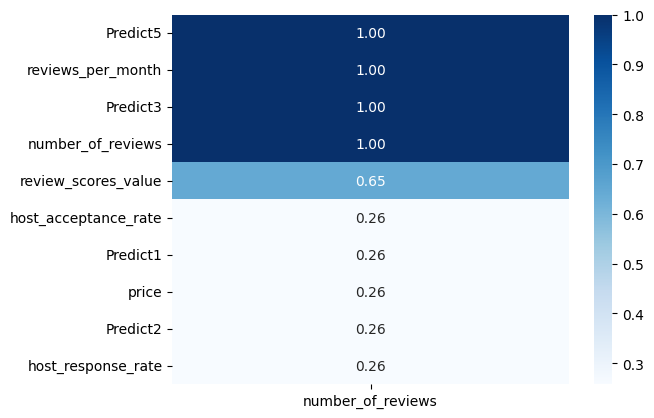

In [112]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map1 = sns.heatmap(ReviewsModel, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map1

In [113]:
# Modelo original
df = df[df["room_type_num"] == 2]
df = df.drop("room_type_num", axis = 1)
df

# Separamos los datos cuantitativos
dfModel_2 = df.select_dtypes(np.number)
dfModel_2

,host_id,host_since,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,...,host_response_time_num,neighbourhood_Category_num,bathroom_text_num,beds,review_scores_value,reviews_per_month,review_scores_location,review_scores_rating,review_scores_cleanliness,review_scores_communication
2036,529763480,2023,0,1,1,1,45.439263,-75.492699,1.0,1,...,0,3,5,1,5,1.16,5,5,5,5
2811,133508759,2017,0,10,0,1,45.408840,-75.697406,1.0,1,...,2,2,5,6,5,1.00,5,5,5,5
2824,133508759,2017,0,10,0,1,45.408939,-75.699061,1.0,1,...,2,2,5,1,4,1.00,5,5,5,5
2825,133508759,2017,0,10,0,1,45.410542,-75.699181,1.0,1,...,2,2,5,1,5,1.16,5,5,5,5
2826,133508759,2017,0,10,0,1,45.410159,-75.697533,1.0,1,...,2,2,5,1,5,1.16,5,5,5,5
2827,133508759,2017,0,10,0,1,45.408708,-75.699440,1.0,1,...,2,2,5,1,5,1.16,5,5,5,5
2828,133508759,2017,0,10,0,1,45.408797,-75.699180,1.0,1,...,2,2,5,1,5,1.16,5,5,5,5


In [114]:
# Correlación de 'number_of_reviews' con las demás y filtrando las correlaciones fuertes
ReviewsModel_2 = abs(dfModel_2.corr()['number_of_reviews'])
ReviewsModel_2 = ReviewsModel_2[ReviewsModel_2.abs() > 0.2].sort_values(ascending=False).to_frame()
ReviewsModel_2


,number_of_reviews
reviews_per_month,1.000000
number_of_reviews_ltm,1.000000
number_of_reviews_l30d,1.000000
number_of_reviews,1.000000
review_scores_value,0.645497
beds,0.645497
review_scores_accuracy,0.645497
amenities_num,0.591608
latitude,0.284241
priceMex,0.258199


<Axes: >

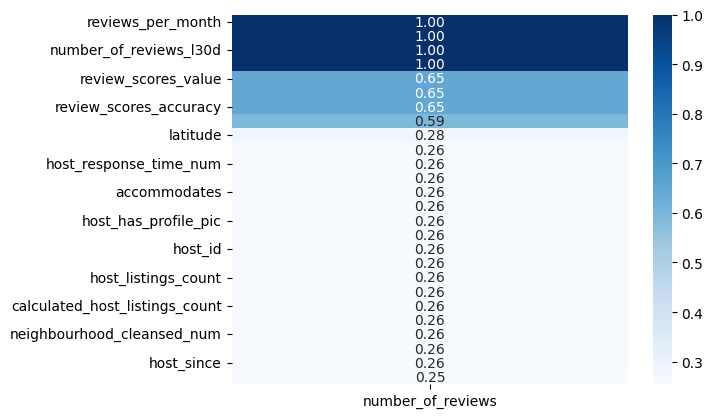

In [115]:
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map2 = sns.heatmap(ReviewsModel_2, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map2

<Axes: xlabel='review_scores_value', ylabel='number_of_reviews'>

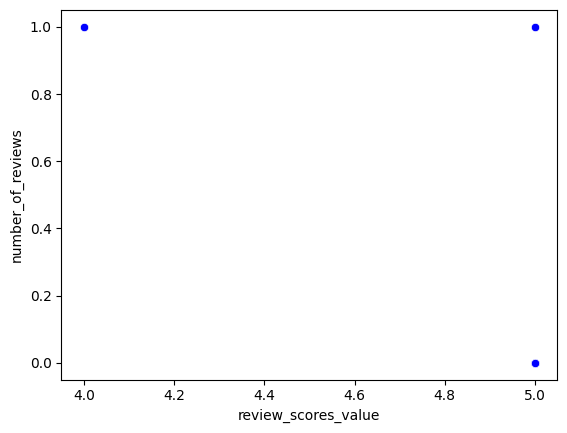

In [116]:
# Para este tipo de habitación "Private Room", el mejor modelo matemático simple que describe de mejor manera el número de reseñas es el siguiente:
from turtle import color
sns.scatterplot(x = 'review_scores_value', y = 'number_of_reviews', color = 'blue', data = dfHome)

In [117]:
# Declaramos las variables dependientes e independientes de la regresión lineal
Vars_Indep = dfHome[["review_scores_value"]]
Var_Dep = dfHome[["number_of_reviews"]]

In [118]:
model = LinearRegression()
# Ajustamos el modelo con las variables declaradas
model.fit(X = Vars_Indep, y = Var_Dep)
# Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_value'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[-0.83333333]]),
 'rank_': 1,
 'singular_': array([0.9258201]),
 'intercept_': array([4.33333333])}

**Modelo Matemático: y = -0.83333333x + 4.33333333**

In [119]:
# Predecimos los valores de "number_of_reviews" a partir de la variable "reviews_per_month"
y_pred = model.predict(X = dfHome[['review_scores_value']])
y_pred
# Insertamos la columna de preddiciones en el df
dfHome.insert(13, 'PredictFinal', y_pred)
dfHome

,room_type_num,Predict3,host_acceptance_rate,Predict1,host_response_rate,review_scores_location,Predict4,Predict5,review_scores_cleanliness,price,availability_365,Predict2,number_of_reviews,PredictFinal,Predict6,reviews_per_month,review_scores_communication,review_scores_value
2036,2,71.2,0.0,1.421085e-14,0.0,5,5.0,267.8,5,60,269,5.684342e-14,0,0.166667,1.114286,1.16,5,5
2811,2,89.0,89.0,8.900000e+01,86.0,5,5.0,267.5,5,45,267,8.900000e+01,1,0.166667,1.114286,1.00,5,5
2824,2,89.0,89.0,8.900000e+01,86.0,5,5.0,267.5,5,45,268,8.900000e+01,1,1.000000,1.114286,1.00,5,4
2825,2,71.2,89.0,8.900000e+01,86.0,5,5.0,267.8,5,45,268,8.900000e+01,0,0.166667,1.114286,1.16,5,5
2826,2,71.2,89.0,8.900000e+01,86.0,5,5.0,267.8,5,45,267,8.900000e+01,0,0.166667,1.114286,1.16,5,5
2827,2,71.2,89.0,8.900000e+01,86.0,5,5.0,267.8,5,45,268,8.900000e+01,0,0.166667,1.114286,1.16,5,5
2828,2,71.2,89.0,8.900000e+01,86.0,5,5.0,267.8,5,45,267,8.900000e+01,0,0.166667,1.114286,1.16,5,5


<Axes: xlabel='review_scores_value', ylabel='number_of_reviews'>

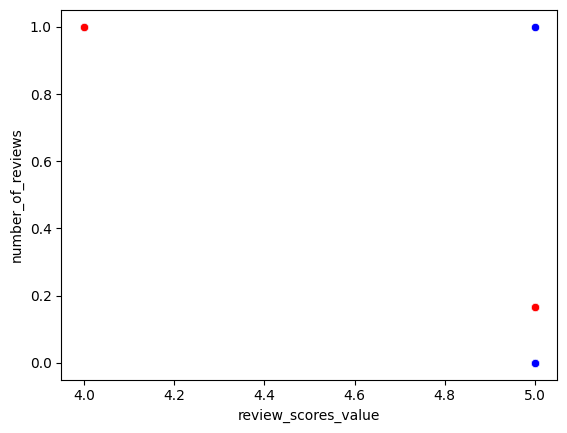

In [120]:
# Gráfica de comparación
sns.scatterplot(x = 'review_scores_value', y = 'number_of_reviews', color = 'blue', data = dfHome)
sns.scatterplot(x = 'review_scores_value', y = 'PredictFinal', color = "red", data = dfHome)

In [121]:
# Coeficiente de determinación de nuestro modelo (R cuadrada)
coefDeterFinal = model.score(X = Vars_Indep, y = Var_Dep)
coefDeterFinal # Más
# Corroboramos el coeficiente de correlación de nuestro modelo
coefCorrelFinal = np.sqrt(coefDeterFinal)
coefCorrelFinal # Más cercano al 0 es malo (No hay relación) y más cercano al 1 es bueno (Perfecto)

0.6454972243679029